<a href="https://colab.research.google.com/github/countifs/kaggle/blob/main/L%26T_Vehicle_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 작업환경 설정**

> ## **1.1 런타임 유형 변경 : None → GPU**

In [ ]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



> ## **1.2 구글 드라이브 마운트**

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> ## **1.3 작업경로 변경**

In [2]:
print('> 변경 전 경로 : ' , os.getcwd())
os.chdir('/content/drive/MyDrive/kaggle/2. L&T Vehicle Loan Default Prediction')
print('> 변경 후 경로 : ' , os.getcwd())

> 변경 전 경로 :  /content
> 변경 후 경로 :  /content/drive/MyDrive/kaggle/2. L&T Vehicle Loan Default Prediction


> ## **1.4 라이브러리 불러오기**

In [3]:
#load packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rn

# loading Common Model Algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
from sklearn import tree

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# **2. 데이터 준비**

> ## **2.1 데이터 불러오기**

In [4]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
variable = pd.read_csv('data_dictionary.csv')

 > ## **2.2 변수 설명**

In [5]:
#컬럼명 조회
print(type(variable.columns))
print(variable.columns)
print(train.columns)

<class 'pandas.core.indexes.base.Index'>
Index(['Unnamed: 0', 'Variable Name', 'Description', 'Unnamed: 2'], dtype='object')
Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIR

In [6]:
variable.head()

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN


 >> ### **2.2.1 variable 테이블 정리**

In [7]:
#info 조회
variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     41 non-null     int64 
 1   Variable Name  41 non-null     object
 2   Description    41 non-null     object
 3   Unnamed: 2     2 non-null      object
dtypes: int64(1), object(3)
memory usage: 1.4+ KB


In [8]:
# variable 테이블 정리
var = variable[['Variable Name', 'Description', 'Unnamed: 2']] # 사용할 컬럼만 선택
var.columns = [['Variable Name', 'Description', 'Etc']] # 'Unnamed: 2' 컬럼명 변경
var.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Variable Name,UniqueID,loan_default,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode,Date.of.Birth,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
Description,Identifier for customers,Payment default in the first EMI on due date,Amount of Loan disbursed,Cost of the Asset,Loan to Value of the asset,Branch where the loan was disbursed,Vehicle Dealer where the loan was disbursed,"Vehicle manufacturer(Hero, Honda, TVS etc.)",Current pincode of the customer,Date of birth of the customer,...,total Principal outstanding amount of the acti...,total amount that was sanctioned for all the l...,total amount that was disbursed for all the lo...,EMI Amount of the primary loan,EMI Amount of the secondary loan,New loans taken by the customer in last 6 mont...,Loans defaulted in the last 6 months,Average loan tenure,Time since first loan,Enquries done by the customer for loans
Etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#행 순서 위치 변경을 위한 인덱스번호 재배열

var_range1 = [1]
var_range2 = [0]
# var_range3 = list(pd.RangeIndex(start = 2, stop = 41, step = 1)) # https://gooopy.tistory.com/102
var_range3 = list(range(2,41))

print(var_range1)
print(var_range2)
print(var_range3)

var_sum = var_range1 + var_range2 + var_range3

[1]
[0]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [10]:
#행 순서 위치 변경
var = var.reindex(index = var_sum)
var['Variable Name'].T

,1,0,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Variable Name,loan_default,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode,Date.of.Birth,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES


In [11]:
var.index = list(range(41))
var.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
Variable Name,loan_default,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode,Date.of.Birth,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
Description,Payment default in the first EMI on due date,Identifier for customers,Amount of Loan disbursed,Cost of the Asset,Loan to Value of the asset,Branch where the loan was disbursed,Vehicle Dealer where the loan was disbursed,"Vehicle manufacturer(Hero, Honda, TVS etc.)",Current pincode of the customer,Date of birth of the customer,...,total Principal outstanding amount of the acti...,total amount that was sanctioned for all the l...,total amount that was disbursed for all the lo...,EMI Amount of the primary loan,EMI Amount of the secondary loan,New loans taken by the customer in last 6 mont...,Loans defaulted in the last 6 months,Average loan tenure,Time since first loan,Enquries done by the customer for loans
Etc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 > ### **2.2.2 train 테이블 확인하기**

In [12]:
train.shape

(233154, 41)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [14]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


 > #### **2.2.2.1 컬럼명 인덱스 번호 삽입**

In [15]:
#train 데이터 컬럼명 조회
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [16]:
#컬럼명 인덱스 번호 삽입
from pprint import pprint

columns_name = []

for i in range(len(train.columns)):
    if i < 40 :
        object = str(i+1) + "." + train.columns[i]
        columns_name.append(object)
    if i == 40 :
        object2 = str(0) + "_" + train.columns[i]
        columns_name.append(object2)

pprint(columns_name)

['1.UniqueID',
 '2.disbursed_amount',
 '3.asset_cost',
 '4.ltv',
 '5.branch_id',
 '6.supplier_id',
 '7.manufacturer_id',
 '8.Current_pincode_ID',
 '9.Date.of.Birth',
 '10.Employment.Type',
 '11.DisbursalDate',
 '12.State_ID',
 '13.Employee_code_ID',
 '14.MobileNo_Avl_Flag',
 '15.Aadhar_flag',
 '16.PAN_flag',
 '17.VoterID_flag',
 '18.Driving_flag',
 '19.Passport_flag',
 '20.PERFORM_CNS.SCORE',
 '21.PERFORM_CNS.SCORE.DESCRIPTION',
 '22.PRI.NO.OF.ACCTS',
 '23.PRI.ACTIVE.ACCTS',
 '24.PRI.OVERDUE.ACCTS',
 '25.PRI.CURRENT.BALANCE',
 '26.PRI.SANCTIONED.AMOUNT',
 '27.PRI.DISBURSED.AMOUNT',
 '28.SEC.NO.OF.ACCTS',
 '29.SEC.ACTIVE.ACCTS',
 '30.SEC.OVERDUE.ACCTS',
 '31.SEC.CURRENT.BALANCE',
 '32.SEC.SANCTIONED.AMOUNT',
 '33.SEC.DISBURSED.AMOUNT',
 '34.PRIMARY.INSTAL.AMT',
 '35.SEC.INSTAL.AMT',
 '36.NEW.ACCTS.IN.LAST.SIX.MONTHS',
 '37.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 '38.AVERAGE.ACCT.AGE',
 '39.CREDIT.HISTORY.LENGTH',
 '40.NO.OF_INQUIRIES',
 '0_loan_default']


In [17]:
#컬럼명 변경
train.columns = columns_name 
train.columns

Index(['1.UniqueID', '2.disbursed_amount', '3.asset_cost', '4.ltv',
       '5.branch_id', '6.supplier_id', '7.manufacturer_id',
       '8.Current_pincode_ID', '9.Date.of.Birth', '10.Employment.Type',
       '11.DisbursalDate', '12.State_ID', '13.Employee_code_ID',
       '14.MobileNo_Avl_Flag', '15.Aadhar_flag', '16.PAN_flag',
       '17.VoterID_flag', '18.Driving_flag', '19.Passport_flag',
       '20.PERFORM_CNS.SCORE', '21.PERFORM_CNS.SCORE.DESCRIPTION',
       '22.PRI.NO.OF.ACCTS', '23.PRI.ACTIVE.ACCTS', '24.PRI.OVERDUE.ACCTS',
       '25.PRI.CURRENT.BALANCE', '26.PRI.SANCTIONED.AMOUNT',
       '27.PRI.DISBURSED.AMOUNT', '28.SEC.NO.OF.ACCTS', '29.SEC.ACTIVE.ACCTS',
       '30.SEC.OVERDUE.ACCTS', '31.SEC.CURRENT.BALANCE',
       '32.SEC.SANCTIONED.AMOUNT', '33.SEC.DISBURSED.AMOUNT',
       '34.PRIMARY.INSTAL.AMT', '35.SEC.INSTAL.AMT',
       '36.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       '37.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', '38.AVERAGE.ACCT.AGE',
       '39.CREDIT.HISTORY.LENGTH', '4

In [18]:
#컬럼 순서 변경을 위한 인덱스 번호 재배치
range1 = [40]
range2 = list(range(0,40))
range_sum = range1 + range2
range_sum

[40,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [19]:
# 컬럼 순번으로 순서 지정하기
cols = train.columns[range_sum]
train[cols].head()

,0_loan_default,1.UniqueID,2.disbursed_amount,3.asset_cost,4.ltv,5.branch_id,6.supplier_id,7.manufacturer_id,8.Current_pincode_ID,9.Date.of.Birth,...,31.SEC.CURRENT.BALANCE,32.SEC.SANCTIONED.AMOUNT,33.SEC.DISBURSED.AMOUNT,34.PRIMARY.INSTAL.AMT,35.SEC.INSTAL.AMT,36.NEW.ACCTS.IN.LAST.SIX.MONTHS,37.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,38.AVERAGE.ACCT.AGE,39.CREDIT.HISTORY.LENGTH,40.NO.OF_INQUIRIES
0,0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0
2,0,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,1,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1
4,1,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1


 > #### **2.2.2.2 데이터셋 information 확인**

In [20]:
train.columns

Index(['1.UniqueID', '2.disbursed_amount', '3.asset_cost', '4.ltv',
       '5.branch_id', '6.supplier_id', '7.manufacturer_id',
       '8.Current_pincode_ID', '9.Date.of.Birth', '10.Employment.Type',
       '11.DisbursalDate', '12.State_ID', '13.Employee_code_ID',
       '14.MobileNo_Avl_Flag', '15.Aadhar_flag', '16.PAN_flag',
       '17.VoterID_flag', '18.Driving_flag', '19.Passport_flag',
       '20.PERFORM_CNS.SCORE', '21.PERFORM_CNS.SCORE.DESCRIPTION',
       '22.PRI.NO.OF.ACCTS', '23.PRI.ACTIVE.ACCTS', '24.PRI.OVERDUE.ACCTS',
       '25.PRI.CURRENT.BALANCE', '26.PRI.SANCTIONED.AMOUNT',
       '27.PRI.DISBURSED.AMOUNT', '28.SEC.NO.OF.ACCTS', '29.SEC.ACTIVE.ACCTS',
       '30.SEC.OVERDUE.ACCTS', '31.SEC.CURRENT.BALANCE',
       '32.SEC.SANCTIONED.AMOUNT', '33.SEC.DISBURSED.AMOUNT',
       '34.PRIMARY.INSTAL.AMT', '35.SEC.INSTAL.AMT',
       '36.NEW.ACCTS.IN.LAST.SIX.MONTHS',
       '37.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', '38.AVERAGE.ACCT.AGE',
       '39.CREDIT.HISTORY.LENGTH', '4

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
1.UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
2.disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
3.asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
4.ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
5.branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
6.supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
7.manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
8.Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
12.State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
13.Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


 > #### **2.2.2.3 데이터셋 결측치 확인**

**Q : isnull, isna 차이는?** <br>
> isnull과 isna 는 같은 기능을 합니다. isnull의 문서를 보면 isna의 별칭이라고 쓰여져 있습니다. <br>
na 는 Numpy의 Na(Not a Number)값을  의미합니다. 결측치, 없는 값입니다. 그래서 isna 로 결측치를 봅니다. <br>
보통 데이터베이스 등에서는 결측치를 null 로 표현합니다. <br>
> 그래서 na보다는 null이라는 단어에 익숙한 사람들을 위해 isna를 isnull 로 사용할 수 있도록 별칭을 만들어 놓은 것 같습니다.


In [24]:
train.isna().sum()

1.UniqueID                                   0
2.disbursed_amount                           0
3.asset_cost                                 0
4.ltv                                        0
5.branch_id                                  0
6.supplier_id                                0
7.manufacturer_id                            0
8.Current_pincode_ID                         0
9.Date.of.Birth                              0
10.Employment.Type                        7661
11.DisbursalDate                             0
12.State_ID                                  0
13.Employee_code_ID                          0
14.MobileNo_Avl_Flag                         0
15.Aadhar_flag                               0
16.PAN_flag                                  0
17.VoterID_flag                              0
18.Driving_flag                              0
19.Passport_flag                             0
20.PERFORM_CNS.SCORE                         0
21.PERFORM_CNS.SCORE.DESCRIPTION             0
22.PRI.NO.OF.

In [25]:
train.isnull().sum()

1.UniqueID                                   0
2.disbursed_amount                           0
3.asset_cost                                 0
4.ltv                                        0
5.branch_id                                  0
6.supplier_id                                0
7.manufacturer_id                            0
8.Current_pincode_ID                         0
9.Date.of.Birth                              0
10.Employment.Type                        7661
11.DisbursalDate                             0
12.State_ID                                  0
13.Employee_code_ID                          0
14.MobileNo_Avl_Flag                         0
15.Aadhar_flag                               0
16.PAN_flag                                  0
17.VoterID_flag                              0
18.Driving_flag                              0
19.Passport_flag                             0
20.PERFORM_CNS.SCORE                         0
21.PERFORM_CNS.SCORE.DESCRIPTION             0
22.PRI.NO.OF.

 > ##### **2.2.2.3.1 seaborn으로 결측치 시각화**




- 📌 [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

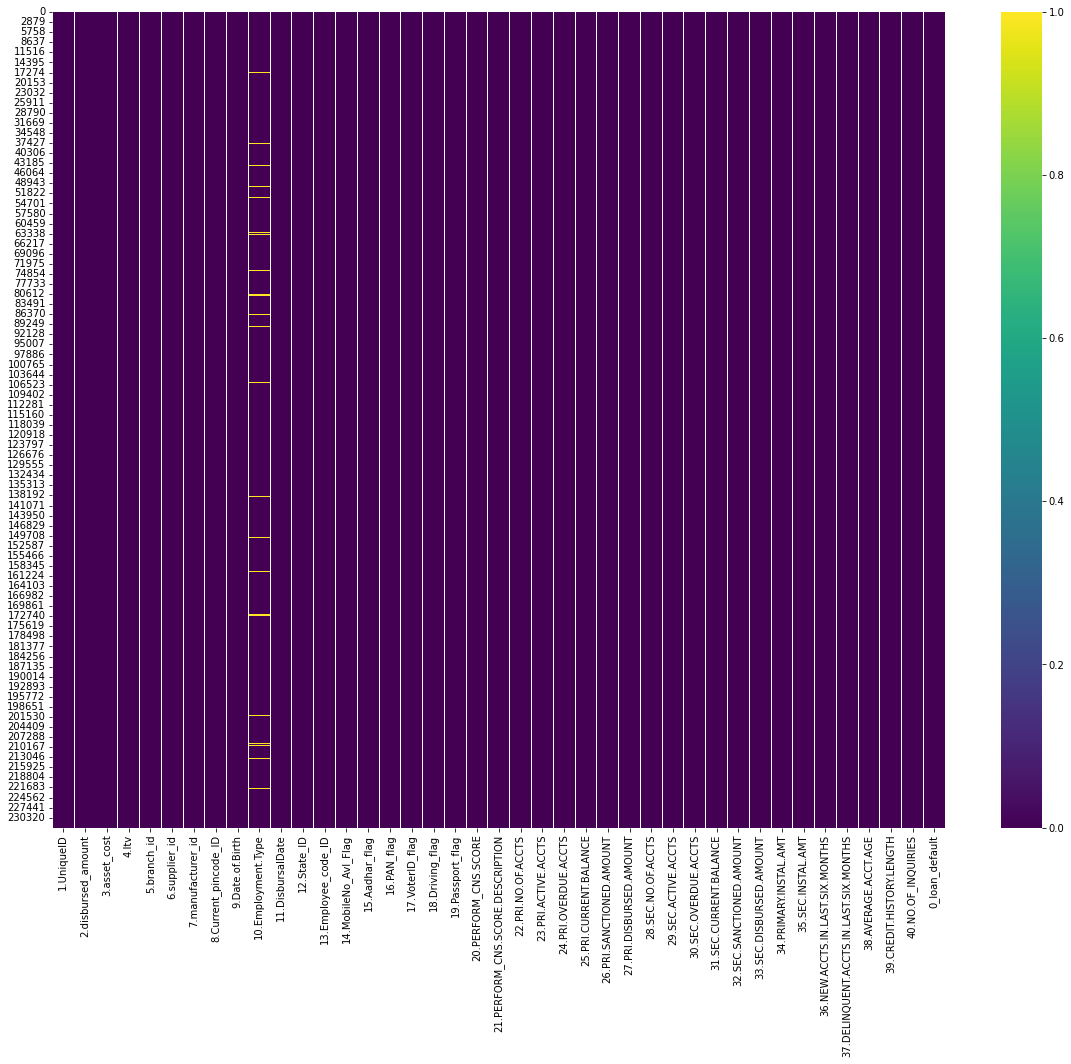

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.subplots(figsize=(20,15) )
sns.heatmap(train.isnull(), cmap='viridis')

plt.show()

 > ##### **2.2.2.3.2 missingno로 결측치 시각화**




- 📌 [missingno](https://github.com/ResidentMario/missingno.git)

In [27]:
import missingno as msno

 > ###### **2.2.2.3.2.1 Matrix**




In [28]:
#Color RGB값 입력 (0 ~ 1 사이로 rescaling 필요)
input_color = (int(input("R:"))/255 , int(input("G:"))/255, int(input("B:"))/255) #20,78,138

R:20
G:78
B:138


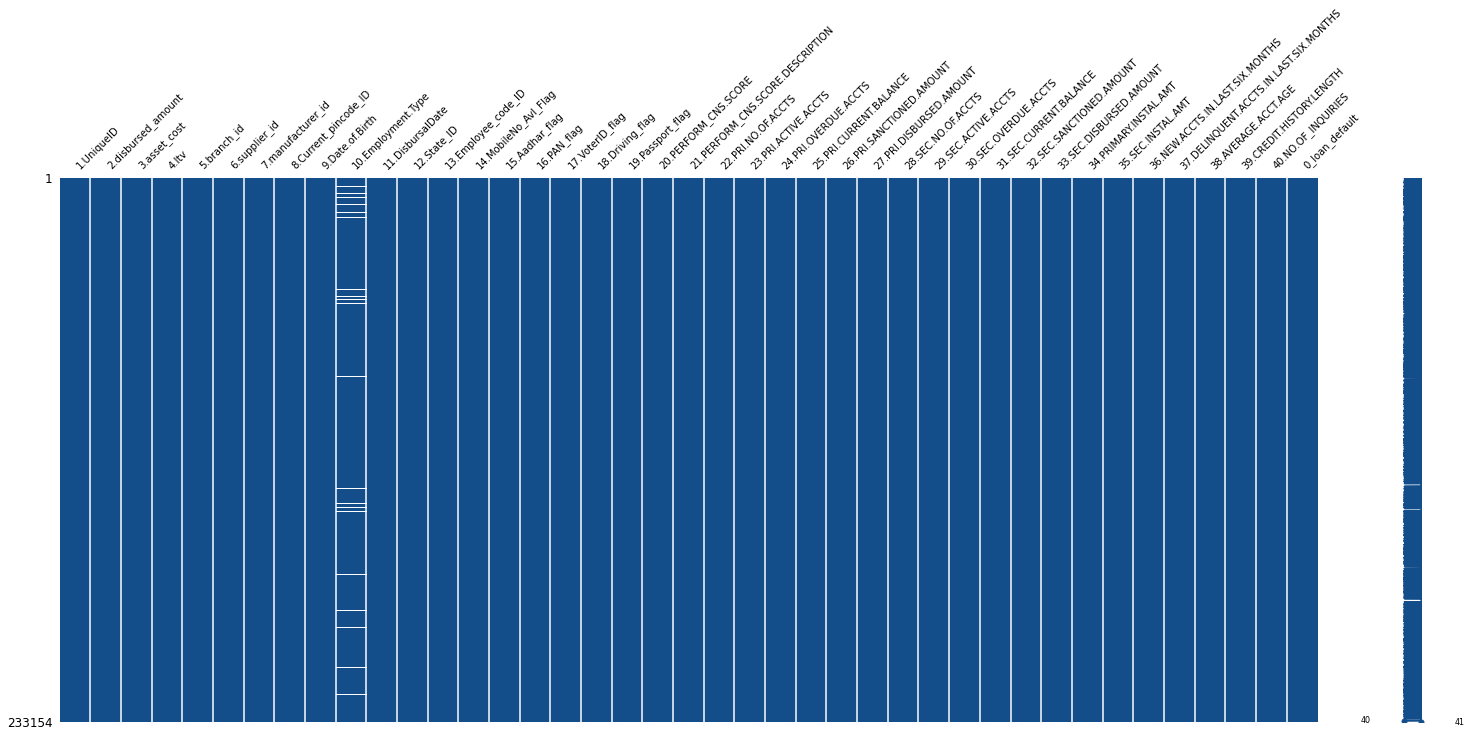

In [29]:
msno.matrix(train, color = input_color, fontsize = 10)

 > ###### **2.2.2.3.2.2 bar**




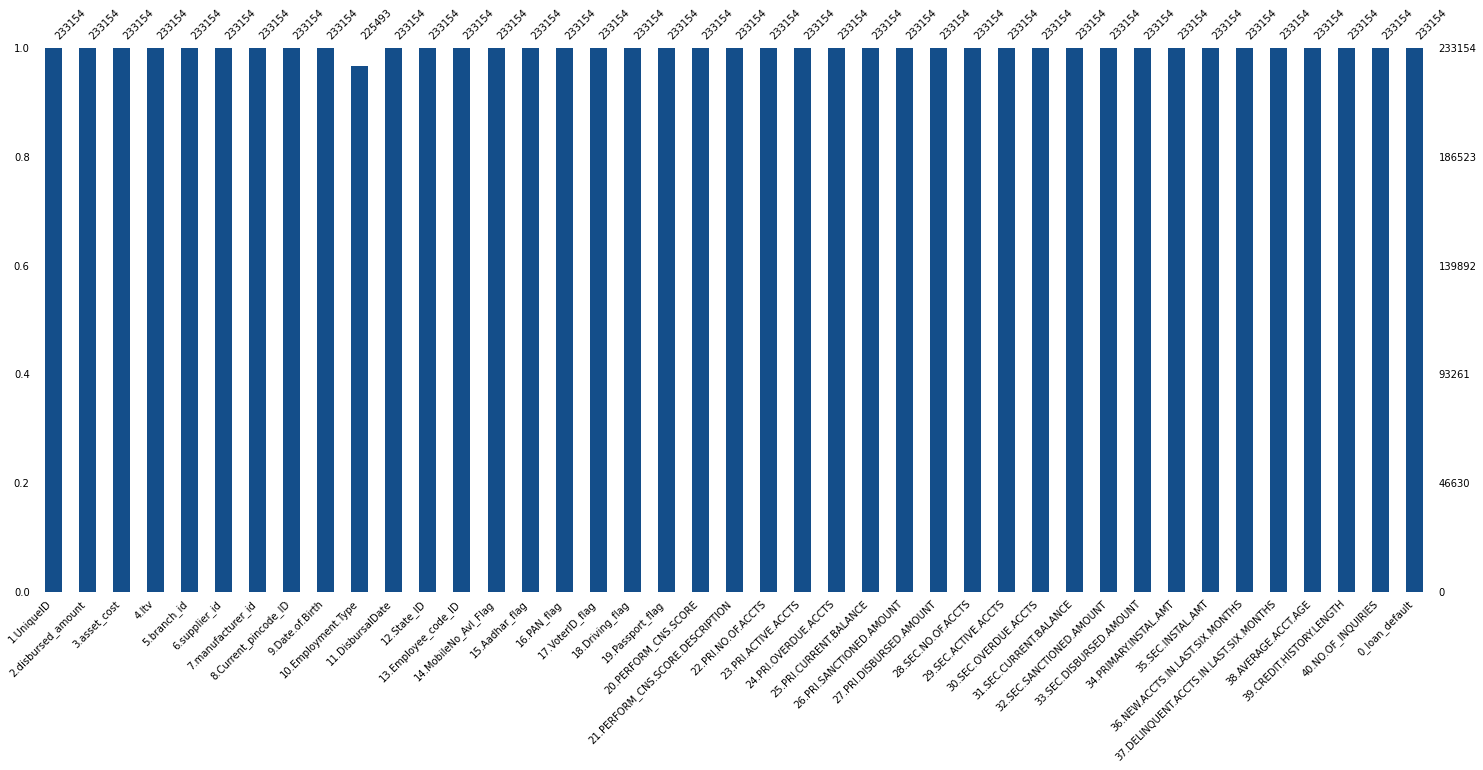

In [30]:
msno.bar(train, color = input_color, fontsize = 10)

 > ###### **2.2.2.3.2.2 dendrogram**




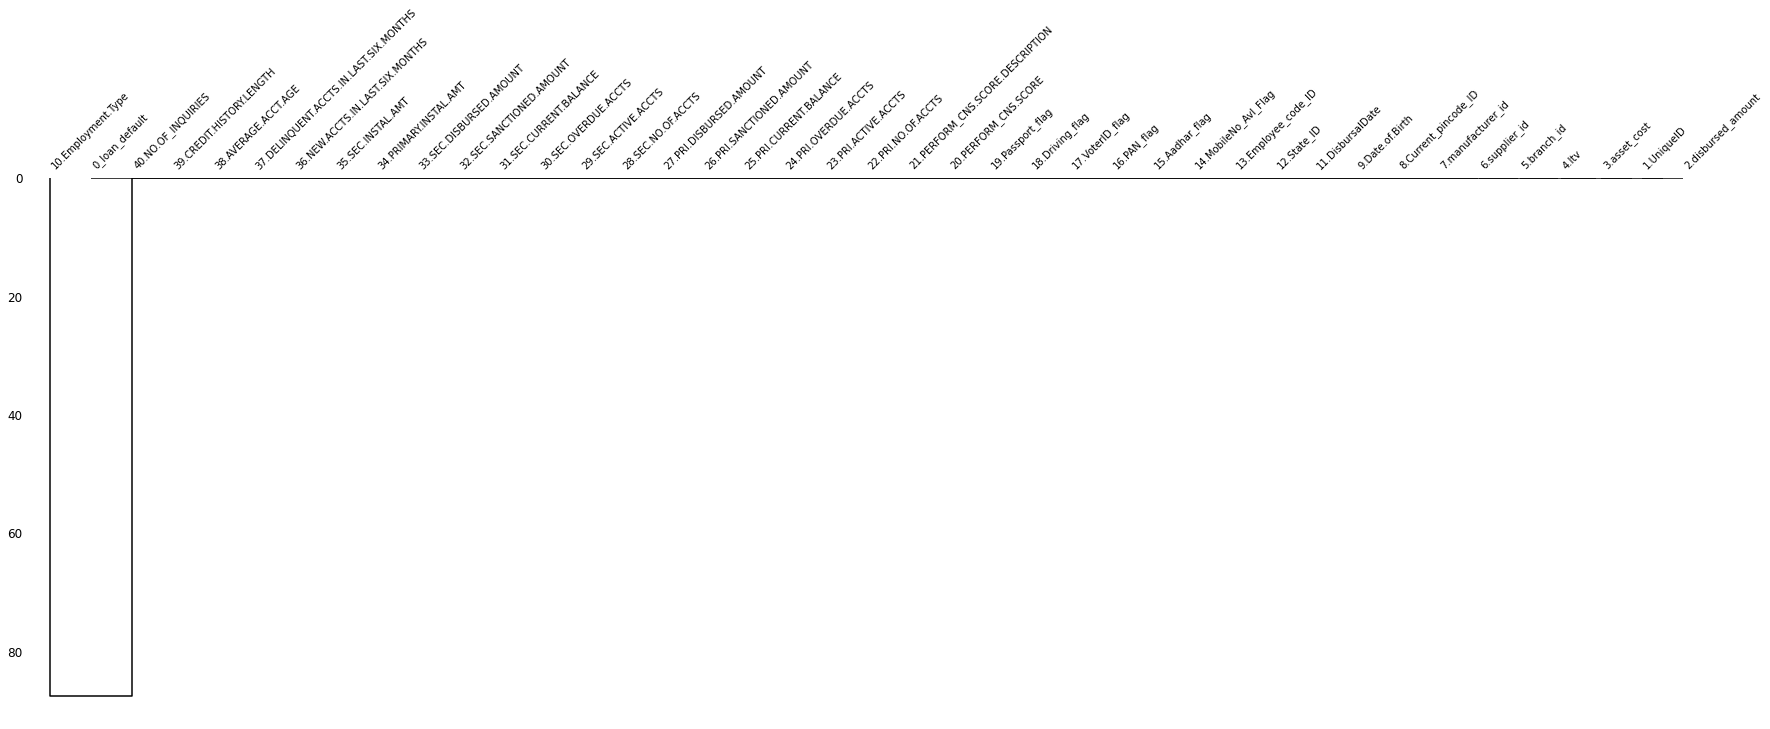

In [31]:
msno.dendrogram(train, fontsize = 10, figsize = (30,10)) 

In [32]:
pip install mlxtend

In [44]:
train.head().T

,0,1,2,3,4
1.UniqueID,420825,537409,417566,624493,539055
2.disbursed_amount,50578,47145,53278,57513,52378
3.asset_cost,58400,65550,61360,66113,60300
4.ltv,89.55,73.23,89.63,88.48,88.39
5.branch_id,67,67,67,67,67
6.supplier_id,22807,22807,22807,22807,22807
7.manufacturer_id,45,45,45,45,45
8.Current_pincode_ID,1441,1502,1497,1501,1495
9.Date.of.Birth,01-01-84,31-07-85,24-08-85,30-12-93,09-12-77
10.Employment.Type,Salaried,Self employed,Self employed,Self employed,Self employed


In [36]:
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column], format='%d-%m-%y')
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df[column + '_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis=1)
    return df

In [41]:
train['9.Date.of.Birth']

0         01-01-84
1         31-07-85
2         24-08-85
3         30-12-93
4         09-12-77
            ...   
233149    01-08-88
233150    05-12-88
233151    01-06-76
233152    26-03-94
233153    18-02-84
Name: 9.Date.of.Birth, Length: 233154, dtype: object

,1.UniqueID,2.disbursed_amount,3.asset_cost,4.ltv,5.branch_id,6.supplier_id,7.manufacturer_id,8.Current_pincode_ID,10.Employment.Type,11.DisbursalDate,...,35.SEC.INSTAL.AMT,36.NEW.ACCTS.IN.LAST.SIX.MONTHS,37.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,38.AVERAGE.ACCT.AGE,39.CREDIT.HISTORY.LENGTH,40.NO.OF_INQUIRIES,0_loan_default,9.Date.of.Birth_year,9.Date.of.Birth_month,9.Date.of.Birth_day
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,03-08-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,1,1
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,26-09-18,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1985,7,31
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,01-08-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,8,24
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,26-10-18,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1993,12,30
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,26-09-18,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,Salaried,26-10-18,...,0,0,0,1yrs 9mon,3yrs 3mon,0,0,1988,8,1
233150,606141,73651,100600,74.95,34,23775,51,990,Self employed,23-10-18,...,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1988,12,5
233151,613658,33484,71212,48.45,77,22186,86,2299,Salaried,24-10-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1976,6,1
233152,548084,34259,73286,49.10,77,22186,86,2299,Salaried,29-09-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1994,3,26


In [40]:
en_df

,1.UniqueID,2.disbursed_amount,3.asset_cost,4.ltv,5.branch_id,6.supplier_id,7.manufacturer_id,8.Current_pincode_ID,10.Employment.Type,11.DisbursalDate,...,35.SEC.INSTAL.AMT,36.NEW.ACCTS.IN.LAST.SIX.MONTHS,37.DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,38.AVERAGE.ACCT.AGE,39.CREDIT.HISTORY.LENGTH,40.NO.OF_INQUIRIES,0_loan_default,9.Date.of.Birth_year,9.Date.of.Birth_month,9.Date.of.Birth_day
0,420825,50578,58400,89.55,67,22807,45,1441,Salaried,03-08-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1984,1,1
1,537409,47145,65550,73.23,67,22807,45,1502,Self employed,26-09-18,...,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1985,7,31
2,417566,53278,61360,89.63,67,22807,45,1497,Self employed,01-08-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1985,8,24
3,624493,57513,66113,88.48,67,22807,45,1501,Self employed,26-10-18,...,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1993,12,30
4,539055,52378,60300,88.39,67,22807,45,1495,Self employed,26-09-18,...,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1977,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,Salaried,26-10-18,...,0,0,0,1yrs 9mon,3yrs 3mon,0,0,1988,8,1
233150,606141,73651,100600,74.95,34,23775,51,990,Self employed,23-10-18,...,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1988,12,5
233151,613658,33484,71212,48.45,77,22186,86,2299,Salaried,24-10-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1976,6,1
233152,548084,34259,73286,49.10,77,22186,86,2299,Salaried,29-09-18,...,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1994,3,26
